## Latihan Tambahan

Misalkan kamu adalah data scientist di gojek. Kamu ingin mengetahui apakah kemacetan mempengaruhi tingkat kepuasan pelanggan. Jadi kamu ingin memebandingkan nilai "bintang" dari customer saat dia order di jam macet dan tidak macet. (#hint = data dari customer yang sama)

macet = [2, 3, 5, 4, 5, 4, 4, 3, 4, 3, 4, 5, 4, 5, 4, 3, 4, 3, 3, 5, 4, 3, 4, 3, 4, 3, 4, 4, 5]

tidak_macet = [2, 2, 4, 5, 4, 3, 3, 3, 3, 3, 3, 4, 4, 5, 4, 3, 3, 2, 3, 4, 4, 3, 3, 3, 4, 3, 4, 3, 4]

1. Buat hipotesisnya
2. Lakukan uji asumsi normalitasnya
3. Jika datanya normal lakukan uji parametrik, jika tidak berdistribusi normal lakukan uji nonparametrik
4. Apa kesimpulan uji hipotesisnya?

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats

In [2]:
#DATA

macet = np.array([2, 3, 5, 4, 5, 4, 4, 3, 4, 3, 4, 5, 4, 5, 4, 3, 4, 3, 3, 5, 4, 3, 4, 3, 4, 3, 4, 4, 5])
tidak_macet = np.array([2, 2, 4, 5, 4, 3, 3, 3, 3, 3, 3, 4, 4, 5, 4, 3, 3, 2, 3, 4, 4, 3, 3, 3, 4, 3, 4, 3, 4])

In [3]:
len(macet), len(tidak_macet)

(29, 29)

## Uji Normalitas

C:\Users\Alifa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Alifa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

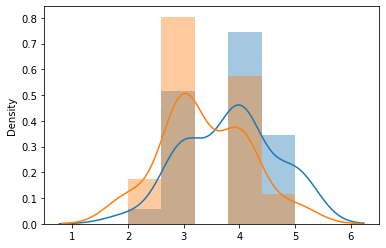

In [14]:
#HISTOGRAM

sns.distplot(macet)
sns.distplot(tidak_macet)

Berdasarkan histogram diatas, data terdistibusi normal karena cenderung berbentuk lonceng dengan rata-rata di tengah. Asumsikan Selang kepercayaan = 95% dan alpha 5%

In [5]:
#UJI Kolmogorov-smirnov

z_score_macet = stats.zscore(macet)
z_score_tidak_macet = stats.zscore(tidak_macet)
print("Uji Kolmogorov-smornov data macet =\n", stats.kstest(z_score_macet, "norm"))
print("Uji Kolmogorov-smornov data tidak macet =\n", stats.kstest(z_score_tidak_macet, "norm"))

Uji Kolmogorov-smornov data macet =
 KstestResult(statistic=0.2414618941043637, pvalue=0.056685222453497386)
Uji Kolmogorov-smornov data tidak macet =
 KstestResult(statistic=0.2769460572882385, pvalue=0.018550502658514656)


* Hasil dari p-value macet       = 0.0566(<=0.05) Data tidak terdistribusi normal
* Hasil dari p-value tidak macet = 0.0185(<=0.05) Data tidak terdistribusi normal

* Jika p-value <= alpha maka Ho ditolak
* Jika p-value > alpha maka Ho diterima

Karena kedua nilai p-value <= 0.05, maka Ho ditolak dan data tidak terdistibusi normal

## Uji Wilcoxon (Non-Parametik)

Ho = Tidak ada perbedaan yang signifikan(keduanya sama)

Ha = Ada perbedaa yang signifikan(keadaan macet dan tidak nya lalu lintah mempengaruhi rating bintang yang diberikan pengguna ke mitra gojek)

Dikarenakan data tidak terdistribusi normal, maka Uji Wilcoxon dilakukan:

In [16]:
a = macet - tidak_macet
stats.wilcoxon(a)

WilcoxonResult(statistic=8.0, pvalue=0.0007891129890156299)

Karena p-value = 0.0007 (<=0.5), maka Ho ditolak. 

## Kesimpulan

Karena Ho ditolak, maka kemacetan berpangaruh signifikan terhadap rating bintang yang diberikan oleh user kepada mitra.